# Forward Thinking + Tricks
##### Sean Wade

In [11]:
from forwardThinking.datasets import load_mnist
from forwardThinking.models import PassForwardThinking, ForwardThinking, DNN

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.display import HTML
import urllib2
HTML(open("./jupyter.css", "r").read())

In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Helper Functions

In [13]:
def plot_acc_loss(acc, loss, val_acc=None, val_loss=None):
    plt.figure(figsize=(15,7))
    plt.subplot(121)
    plt.title('Accuracy')
    plt.plot(acc)
    if val_acc != None:
        plt.plot(val_acc)
    plt.subplot(122)
    plt.title('Loss')
    plt.plot(loss)
    if val_loss != None:
        plt.plot(val_loss)
    plt.tight_layout()
    plt.show()

In [14]:
def model_summary(model):
    print "Model Name: %s" % model.summary['model_name']
    print "Model Version: %-20s" % model.summary['model_version']
    print "Training Time: %s" % model.summary['training_time']
    print "Training Acc: %s" % model.summary['accuracy'][-1]
    print "Testing Acc: %s" % model.summary['val_accuracy'][-1]

In [15]:
# Load the data
x_train, y_train, x_test, y_test = load_mnist()

# Dropout

## Pass-Forward

### With Dropout

In [19]:
passForward = PassForwardThinking([784, 100, 50, 10], freeze=False)
passForward.fit(x_train, y_train, x_test, y_test, epochs= 10, dropout=True, verbose=False)

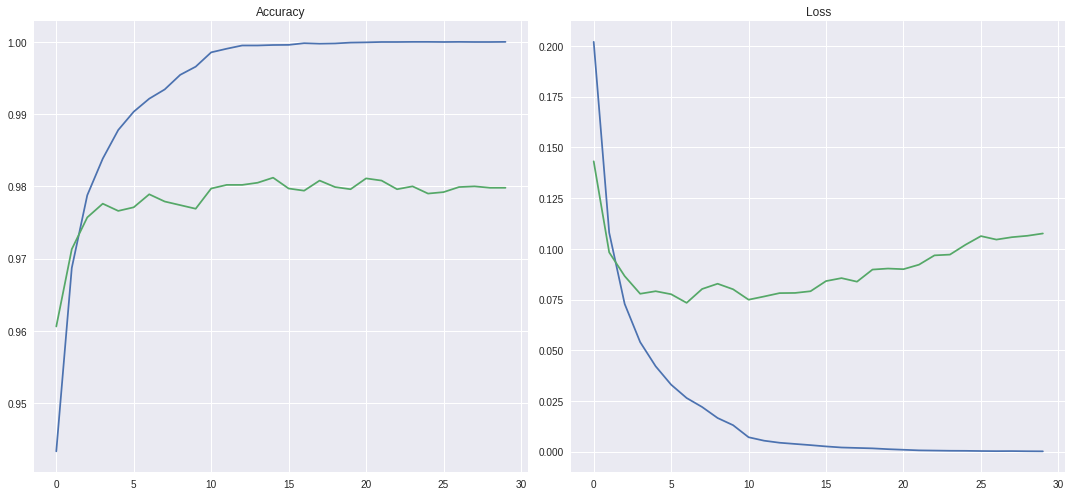

In [20]:
plot_acc_loss(passForward.summary['accuracy'], passForward.summary['loss'],
             passForward.summary['val_accuracy'], passForward.summary['val_loss'])

In [21]:
model_summary(passForward)

Model Name: PassForwardThinking
Model Version: 1.1                 
Training Time: 99.0117819309
Training Acc: 1.0
Testing Acc: 0.9798


### WIthout Dropout

In [ ]:
passForward = PassForwardThinking([784, 100, 50, 10], freeze=False)
passForward.fit(x_train, y_train, x_test, y_test, epochs= 10, dropout=True, verbose=False)

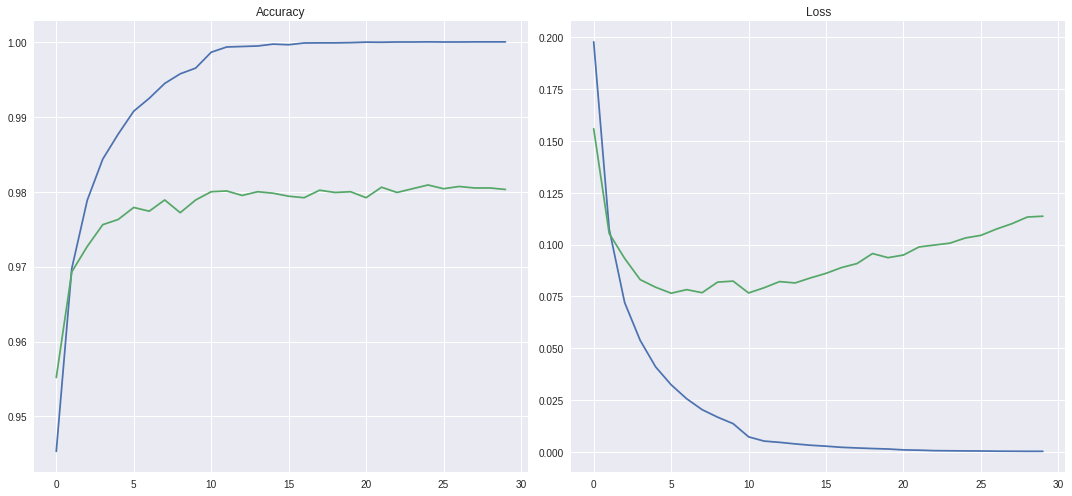

In [95]:
plot_acc_loss(passForward.summary['accuracy'], passForward.summary['loss'],
             passForward.summary['val_accuracy'], passForward.summary['val_loss'])

In [96]:
model_summary(passForward)

Model Name: PassForwardThinking
Model Version: 1.0                 
Training Time: 121.232475996
Training Acc: 1.0
Testing Acc: 0.9803


## Pass-Forward Weight Freezing

### With Dropout
Train layerwise like before, however freeze the connections of old weights once learned.

In [23]:
passForwardFreeze = PassForwardThinking([784, 100, 50, 10], freeze=True)
passForwardFreeze.fit(x_train, y_train, x_test, y_test, epochs=10, dropout=True, verbose=False)

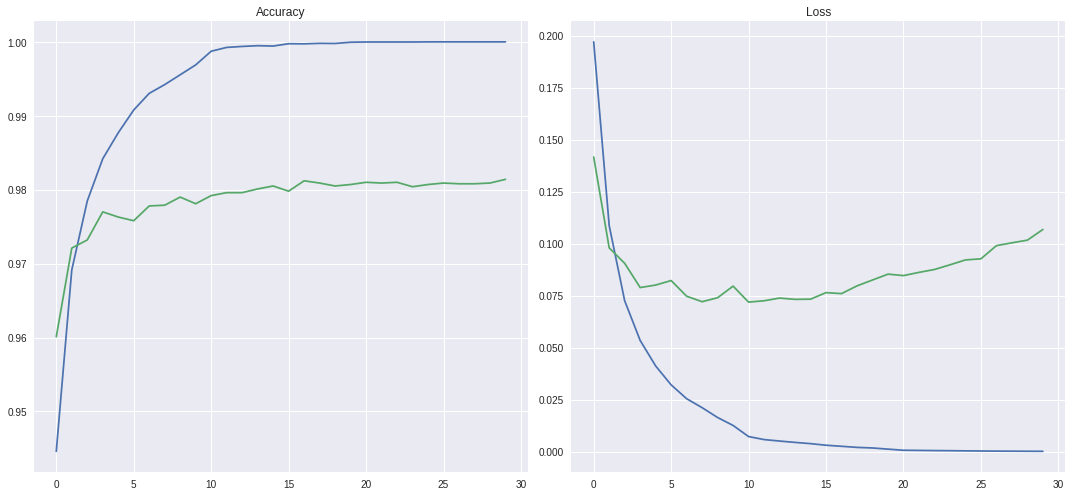

In [24]:
plot_acc_loss(passForwardFreeze.summary['accuracy'], passForwardFreeze.summary['loss'],
             passForwardFreeze.summary['val_accuracy'], passForwardFreeze.summary['val_loss'])

In [25]:
model_summary(passForwardFreeze)

Model Name: PassForwardThinking
Model Version: 1.1                 
Training Time: 97.2523598671
Training Acc: 1.0
Testing Acc: 0.9814


### Without Dropout

In [ ]:
passForwardFreeze = PassForwardThinking([784, 100, 50, 10], freeze=True)
passForwardFreeze.fit(x_train, y_train, x_test, y_test, epochs=10, verbose=False)

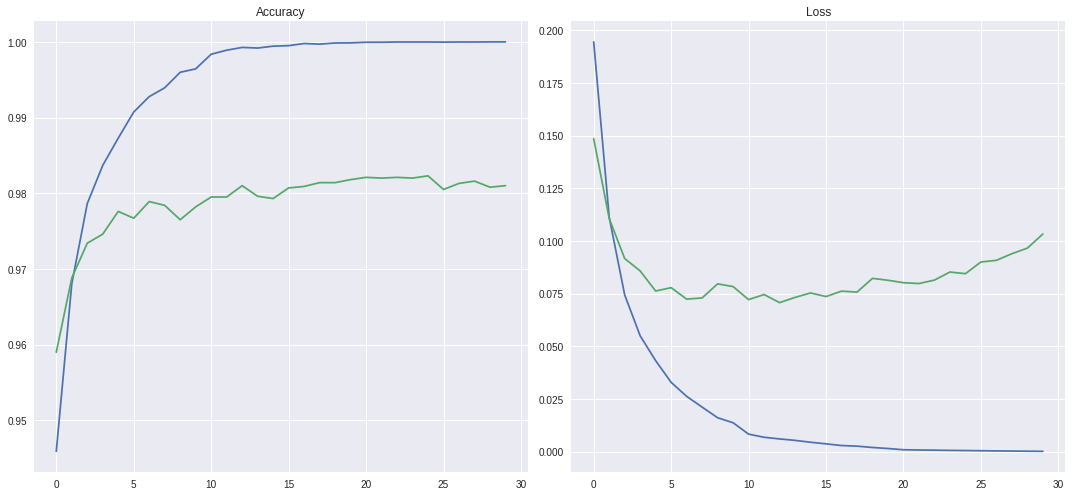

In [98]:
plot_acc_loss(passForwardFreeze.summary['accuracy'], passForwardFreeze.summary['loss'],
             passForwardFreeze.summary['val_accuracy'], passForwardFreeze.summary['val_loss'])

In [99]:
model_summary(passForwardFreeze)

Model Name: PassForwardThinking
Model Version: 1.0                 
Training Time: 115.369642019
Training Acc: 1.0
Testing Acc: 0.981


# L1

## Pass-Forward

In [35]:
passForward = PassForwardThinking([784, 100, 50, 10], freeze=False)
passForward.fit(x_train, y_train, x_test, y_test, epochs= 10, reg_type='l1', reg=500, dropout=True, verbose=False)

Made it


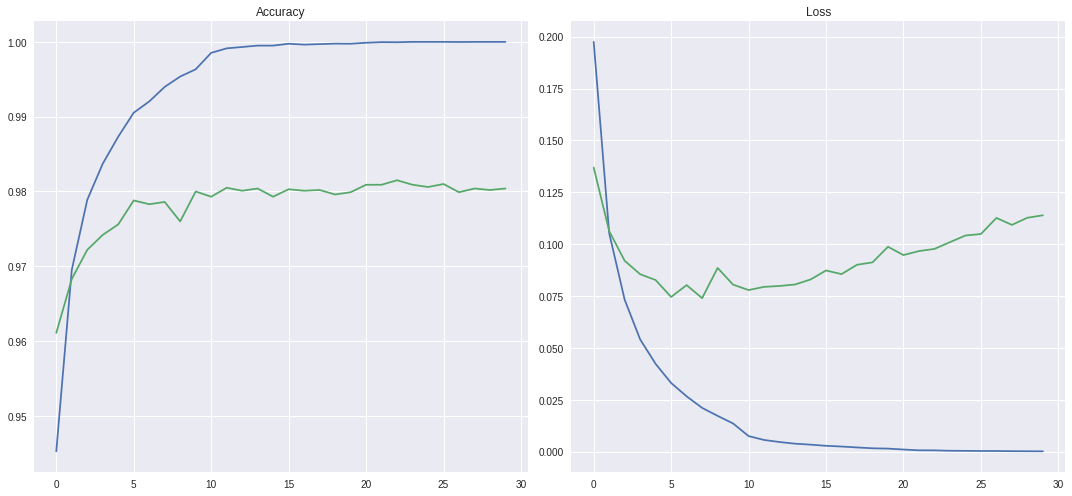

In [36]:
plot_acc_loss(passForward.summary['accuracy'], passForward.summary['loss'],
             passForward.summary['val_accuracy'], passForward.summary['val_loss'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

In [ ]:
gen = datagen.flow(x_train[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()

In [ ]:
# Fit the model with generated data
if TRAIN:
    model.fit_generator(datagen.flow(x_train, y_train,
                        batch_size=BATCH_SIZE),
                        samples_per_epoch=x_train.shape[0],
                        nb_epoch=EPOCHS,
                        validation_data=(x_test, y_test))
else:
    print('Loading pretrained model...')
    stats = pickle.load(open('./load/cnn_augment_stats.p', 'rb'))
    model3 = keras.models.load_model('./load/cnn_augment.h5')
    print('Model Loaded.')